# Lesson 3. Introduction to Spatial Vector Data File Formats in Open Source Python

### About Spatial Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices determines the type of vector that you are working with. There are three types of vector data:

* **Points**: Each individual point is defined by a single x, y coordinate. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines**: Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has a defined `x, y` location.

* **Polygons**: A polygone consists of 3 or more vertices that are connected and "closed." Thus, the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons.

|![vector_objects](https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)| 
|:--:| 
| *3 Types of Vector Objects* |

### Introduction to the Shapefile File Format Which Stores Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` format (.shp). Each individual shapefile can only contain one type of vector because the structure of each is different.

Objects stored in a shapefile often have a set of associated `attributes` that describe the data. For example, a line shapefile that contains the locations of streams might also contain the associated stream name.

### GeoJSON Files and Other Vector Formats

Geospatial data can also be delivered in a GeoJSON format or tabular format where the spatial information is contained in columns.

### What Data Are Stored in Spatial Vector Formats?

* census data including municipal boundaries
* roads, powerlines and other infrastructure boundaries
* political boundaries
* building outlines
* water bodies and river systems
* ecological boundaries
* city locations
* object locations including plots, stream gages, and building locations

### Import Shapefile Data Into Python Using Geopandas

`geopandas` is used to work with geospatial vector data. It is built on `pandas`.

In [1]:
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
os.getcwd()

'/Users/giorgio/earth-analytics'

In [3]:
# Download the data and set working directory
# et.data.get_data(
#     url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')

In [4]:
coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

In [5]:
coastlines = gpd.read_file(coastlines_path)
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


### GeoPandas Creates GeoDataFrames With Same Structure As Pandas DataFrames

The structure of a Geopandas `GeoDataFrame` has only a few differences to a Pandas `DataFrame`:

* the `GeoDataFrame` contains a geometry column which stores spatial information. It stores the boundary information, allowing us to plot points, lines, or polygons

* the `GeoDataFrame` stores spatial attributes such as coordinate reference systems and spatial extents

We can plot the data using `.plot()` just like with Pandas:

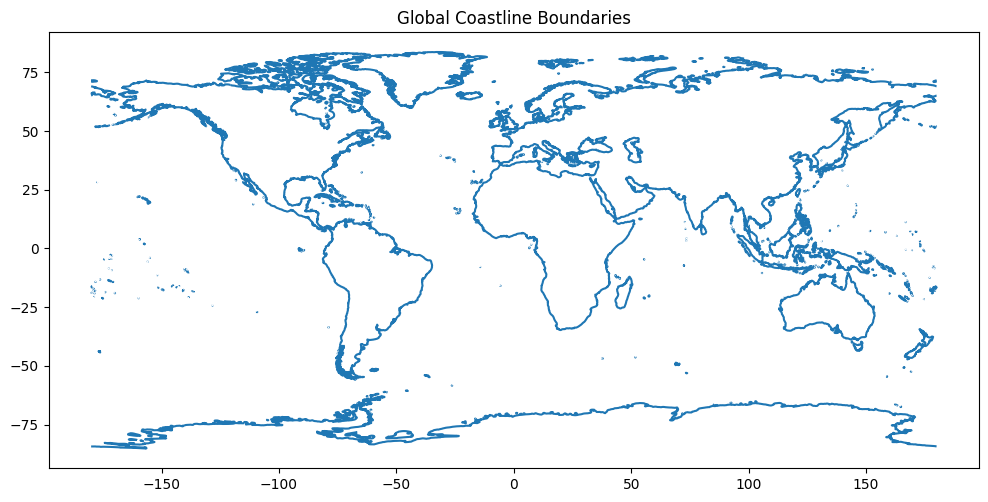

In [6]:
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

ax1.set(title='Global Coastline Boundaries')
plt.show()

Looking at the `GeoDataFrame`, we could see that all of the vectors in the dataset are lines. However, we can also use the `.geom_type` accessor to see the vector type:

In [7]:
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

In [8]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


### Open Vector Point Data

We will open another shapefile using `Geopandas`:

In [9]:
# et.data.get_data(url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple')

In [10]:
# create path
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


### Challenge 1: What Geometry Type Are Your Data

Check the geometry type of the `cities` object that was opened:

In [11]:
cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1246    Point
1247    Point
1248    Point
1249    Point
1250    Point
Length: 1251, dtype: object

### Creating Maps Using Multiple Shapefiles

To plot two datasets together, use a `matplotlib` figure object.

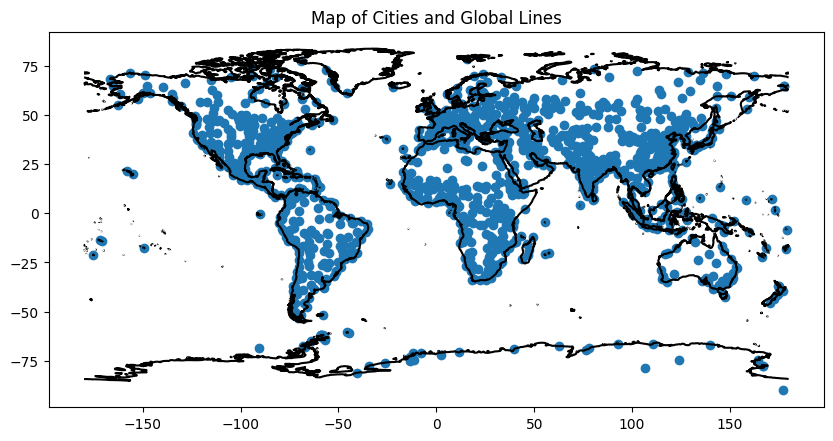

In [12]:
f, ax1 = plt.subplots(figsize=(10, 6))
# pass ax1 to both Geopandas plot calls
coastlines.plot(ax=ax1,
                color="black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

### Challenge 2: Create a Global Map

The code below will download one additional file for you that contains global country boundaries. Your goal is to create a map that contains 3 layers:

1. the cities or populated places layer that you opened above
2. the coastlines layer that you opened above and
3. the countries layer that you will open using the code below

In [13]:
# country_data_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
# et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries", 
                              "ne_50m_admin_0_countries.shp")

In [14]:
countries = gpd.read_file(countries_path)
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


Notice that the vectors here are polygons!

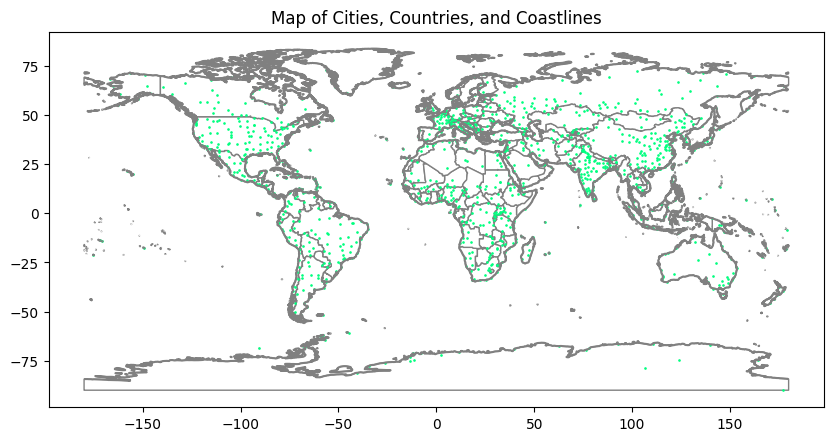

In [15]:
f, ax1 = plt.subplots(figsize=(10, 6))
# pass ax1 to all Geopandas plot calls
coastlines.plot(ax=ax1, edgecolor='grey')  # lines
countries.plot(ax=ax1, color='white', edgecolor='grey')  # polygons
cities.plot(ax=ax1, color='springgreen', markersize=0.8)  # points

# Add a title
ax1.set(title="Map of Cities, Countries, and Coastlines")
plt.show()

### Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it:

|![vector_objects](https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png)| 
|:--:| 
| *Attributes of Spatial Data* |

In [16]:
# view the attributes for a shapefile
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


In [17]:
cities.pop_max

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1246    11748000
1247    18845000
1248     4630000
1249     5183700
1250     7206000
Name: pop_max, Length: 1251, dtype: int64

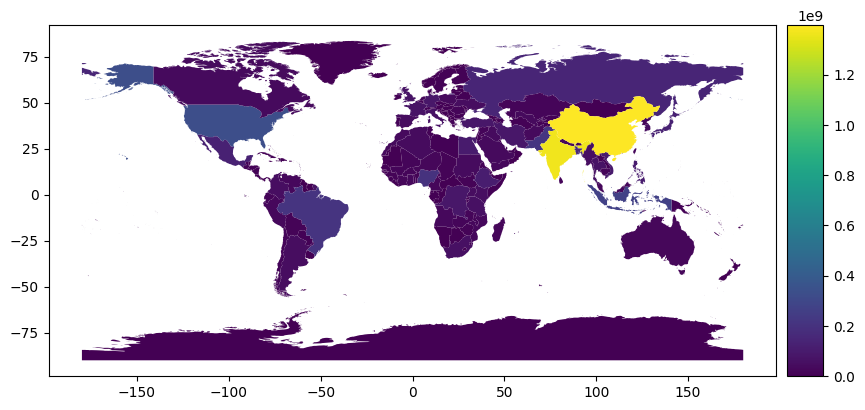

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax1 = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right",
                          size="5%",
                          pad=0.1)

countries.plot(column='POP_EST',
               legend=True,
               ax=ax1,
               cax=cax)
plt.show()

In [19]:
# for c in cities.columns:
#     print(c)

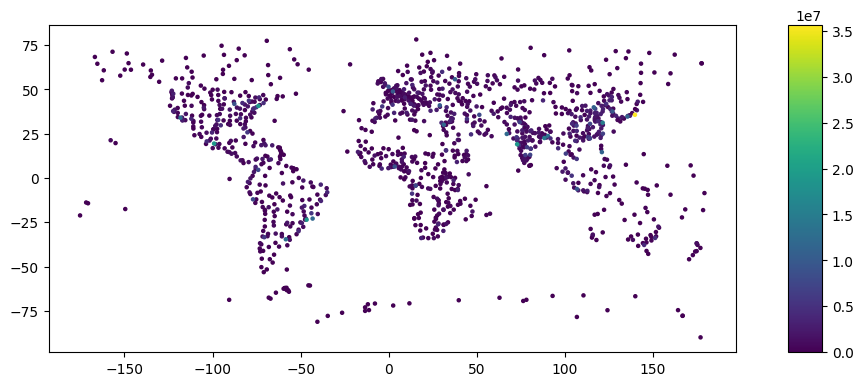

In [20]:
# plot cities object so each point is colored according to 
# the max population value

f, ax1 = plt.subplots(figsize=(10,6))

# add the legend
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right",
                          size="5%",
                          pad=0.5)

# plot the data
cities.plot(column='pop_max', 
            markersize=5, 
            legend=True,
            ax=ax1,
            cax=cax)
plt.show()

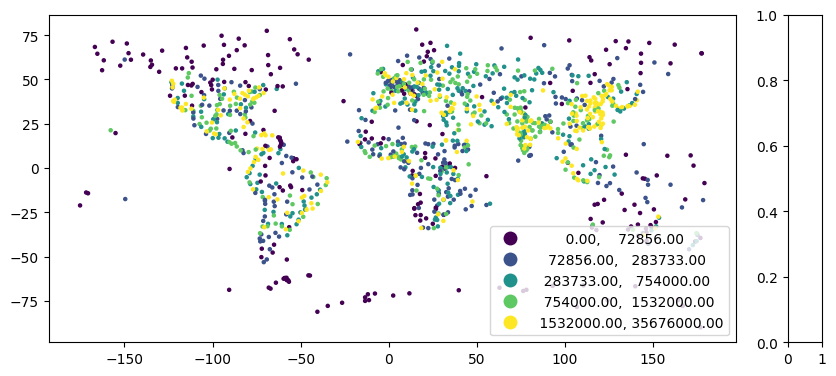

In [21]:
# plot cities object so each point is colored according to 
# the max population value, but use quantiles
# import mapclassify

f, ax1 = plt.subplots(figsize=(10,6))

# add the legend
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right",
                          size="5%",
                          pad=0.5)

# plot the data
cities.plot(column='pop_max', 
            markersize=5, 
            legend=True,
            ax=ax1,
            cax=cax,
            scheme='quantiles')
plt.show()

### Clipping Vector Data

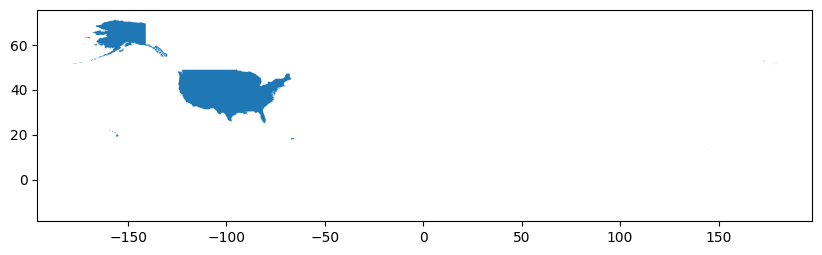

In [23]:
# subset the countries data to just the United States
united_states_boundary = countries.loc[countries['SOVEREIGNT'] == 'United States of America']

f, ax = plt.subplots(figsize=(10,6))
united_states_boundary.plot(ax=ax)
plt.show()

In [25]:
cities_in_usa = gpd.clip(cities, united_states_boundary)  # mask the cities by the united states boundary

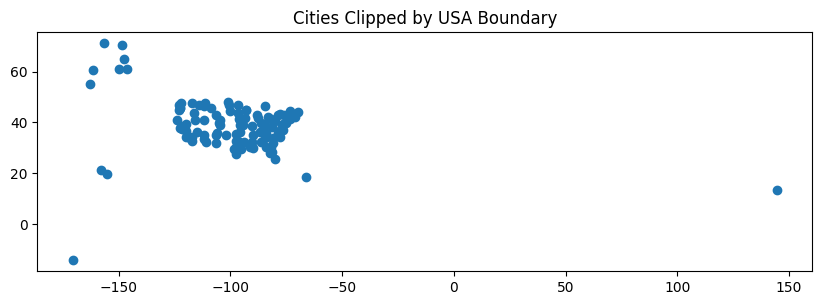

In [26]:
f, ax = plt.subplots(figsize=(10,6))
cities_in_usa.plot(ax=ax)
ax.set(title='Cities Clipped by USA Boundary')
plt.show()